In [1]:
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import requests
f = open('currentData.json')
data = json.load(f)

In [2]:
city = ['Midway City', 'Rossmoor']
latitude = [33.7447, 33.7856]
longitude = [-117.9863, -118.0851]
population = []
ll = []
for i in data['cities']:
    if (len(i['location']) == 2) & (i['city'] != 'All of Orange County'):
        city.append(i['city'])
        latitude.append(i['location'][1])
        longitude.append(i['location'][0])
for i in data['counts'][-2]['location'][:-3]:
    if (i['population'] == 'Not Available') & (i['city'] == 'Rancho Mission Viejo'):
        population.append(36686)
    elif (i['population'] == 'Not Available') & (i['city'] == 'Trabuco Canyon'):
        population.append(21041)
    else:
        population.append(int(i['population'].replace(',', '')))
d = {'City': city, 'Latitude': latitude, 'Longitude': longitude}
df_city = pd.DataFrame(d)
df_city.sort_values(['City'], inplace = True)
df_city.reset_index(drop = True, inplace = True)
d = {'Population': population}
df_pop = pd.DataFrame(d)
df_city = pd.concat([df_city, df_pop], axis=1, sort=False)

In [3]:
date = []
total = []
cases_male = []
cases_female = []
cases_less_than_18 = []
cases_18_to_24 = []
cases_25_to_34 = []
cases_35_to_44 = []
cases_45_to_64 = []
cases_greater_than_65 = []
for i in data['counts'][33:]:
    date.append(i['label']+' 2020')
    total.append(int(i['data'][0]['count']))
    for j in i['data']:
        if (j['category'] == 'Male') & (j['type'] == 'Cases'):
            cases_male.append(int(j['count']))
        elif (j['category'] == 'Female') & (j['type'] == 'Cases'):
            cases_female.append(int(j['count']))
        elif (j['category'] == '<18') & (j['type'] == 'Cases'):
            cases_less_than_18.append(int(j['count']))
        elif (j['category'] == '18 - 24') & (j['type'] == 'Cases'):
            cases_18_to_24.append(int(j['count']))
        elif (j['category'] == '25 - 34') & (j['type'] == 'Cases'):
            cases_25_to_34.append(int(j['count']))
        elif (j['category'] == '35 - 44') & (j['type'] == 'Cases'):    
            cases_35_to_44.append(int(j['count']))
        elif (j['category'] == '45 - 64') & (j['type'] == 'Cases'):    
            cases_45_to_64.append(int(j['count']))
        elif (j['category'] == '≥ 65') & (j['type'] == 'Cases'):    
            cases_greater_than_65.append(int(j['count']))
            
d = {'date':date,
     'total': total,
     'male': cases_male,
     'female': cases_female,
     '< 18': cases_less_than_18,
     '18 - 24': cases_18_to_24,
     '25 - 34': cases_25_to_34,
     '35 - 44': cases_35_to_44,
     '45 - 64': cases_45_to_64,
     '≥ 65': cases_greater_than_65}
df_cases = pd.DataFrame(d)
df_cases['date'] = pd.to_datetime(df_cases['date'], format='%b %d %Y')

In [4]:
date = []
total = []
cases_male = []
cases_female = []
cases_less_than_18 = []
cases_18_to_24 = []
cases_25_to_34 = []
cases_35_to_44 = []
cases_45_to_64 = []
cases_greater_than_65 = []
for i in data['counts'][33:]:
    date.append(i['label']+' 2020')
    total.append(int(i['data'][1]['count']))
    for j in i['data']:
        if (j['category'] == 'Male') & (j['type'] == 'Deaths'):
            cases_male.append(int(j['count']))
        elif (j['category'] == 'Female') & (j['type'] == 'Deaths'):
            cases_female.append(int(j['count']))
        elif (j['category'] == '<18') & (j['type'] == 'Deaths'):
            cases_less_than_18.append(int(j['count']))
        elif (j['category'] == '18 - 24') & (j['type'] == 'Deaths'):
            cases_18_to_24.append(int(j['count']))
        elif (j['category'] == '25 - 34') & (j['type'] == 'Deaths'):
            cases_25_to_34.append(int(j['count']))
        elif (j['category'] == '35 - 44') & (j['type'] == 'Deaths'):    
            cases_35_to_44.append(int(j['count']))
        elif (j['category'] == '45 - 64') & (j['type'] == 'Deaths'):    
            cases_45_to_64.append(int(j['count']))
        elif (j['category'] == '≥ 65') & (j['type'] == 'Deaths'):    
            cases_greater_than_65.append(int(j['count']))
            
d = {'date':date,
     'total': total,
     'male': cases_male,
     'female': cases_female,
     '< 18': cases_less_than_18,
     '18 - 24': cases_18_to_24,
     '25 - 34': cases_25_to_34,
     '35 - 44': cases_35_to_44,
     '45 - 64': cases_45_to_64,
     '≥ 65': cases_greater_than_65}
df_deaths = pd.DataFrame(d)
df_deaths['date'] = pd.to_datetime(df_deaths['date'], format='%b %d %Y')
df_deaths['old_percent'] = df_deaths['≥ 65']/df_deaths['total']

In [5]:
date = []
hospitalized = []
ICU = []

for i in data['counts'][33:]:
    date.append(i['label']+' 2020')
    for j in i['data']:
        if (j['category'] == 'Currently') & (j['type'] == 'Hospitalized'):
            hospitalized.append(int(j['count']))
        elif (j['category'] == 'Currently') & (j['type'] == 'ICU'):
            ICU.append(int(j['count']))

d = {'date':date,
     'hospitalized': hospitalized,
     'ICU': ICU}
df_hospitalized_ICU = pd.DataFrame(d)
df_hospitalized_ICU['date'] = pd.to_datetime(df_hospitalized_ICU['date'], format='%b %d %Y') 

In [6]:
df_case_by_age = pd.concat([df_cases['date'],
                            df_cases['< 18']/df_cases['total']*100, 
                            df_cases['18 - 24']/df_cases['total']*100,
                            df_cases['25 - 34']/df_cases['total']*100,
                            df_cases['35 - 44']/df_cases['total']*100,
                            df_cases['45 - 64']/df_cases['total']*100,
                            df_cases['≥ 65']/df_cases['total']*100],
                           axis = 1,
                           keys = ['date', '< 18', '18 - 24', '25 - 34', '35 - 44', '45 - 64', '≥ 65'])

In [7]:
df_case_by_sex = pd.concat([df_cases['date'], df_cases['male']/df_cases['total']*100, df_cases['female']/df_cases['total']*100],
                           axis = 1,
                           keys = ['date', 'male', 'female'])
df_case_by_sex['Unknown'] = 100 - df_case_by_sex['male'] - df_case_by_sex['female']

Text(0.5, 0, '')

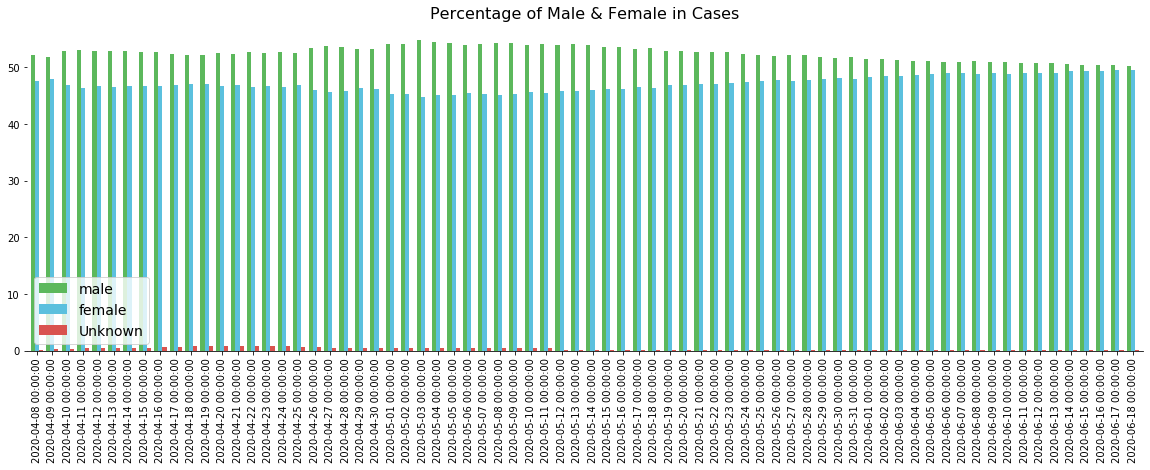

In [8]:

ax = df_case_by_sex.set_index('date').plot(kind='bar',
                 width = 0.8,
                 color = ('#5cb85c', '#5bc0de', '#d9534f'),
                 figsize=(20, 6))

ax.set_title('Percentage of Male & Female in Cases', fontsize = 16)
ax.legend(fontsize = 14, loc = 3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('')


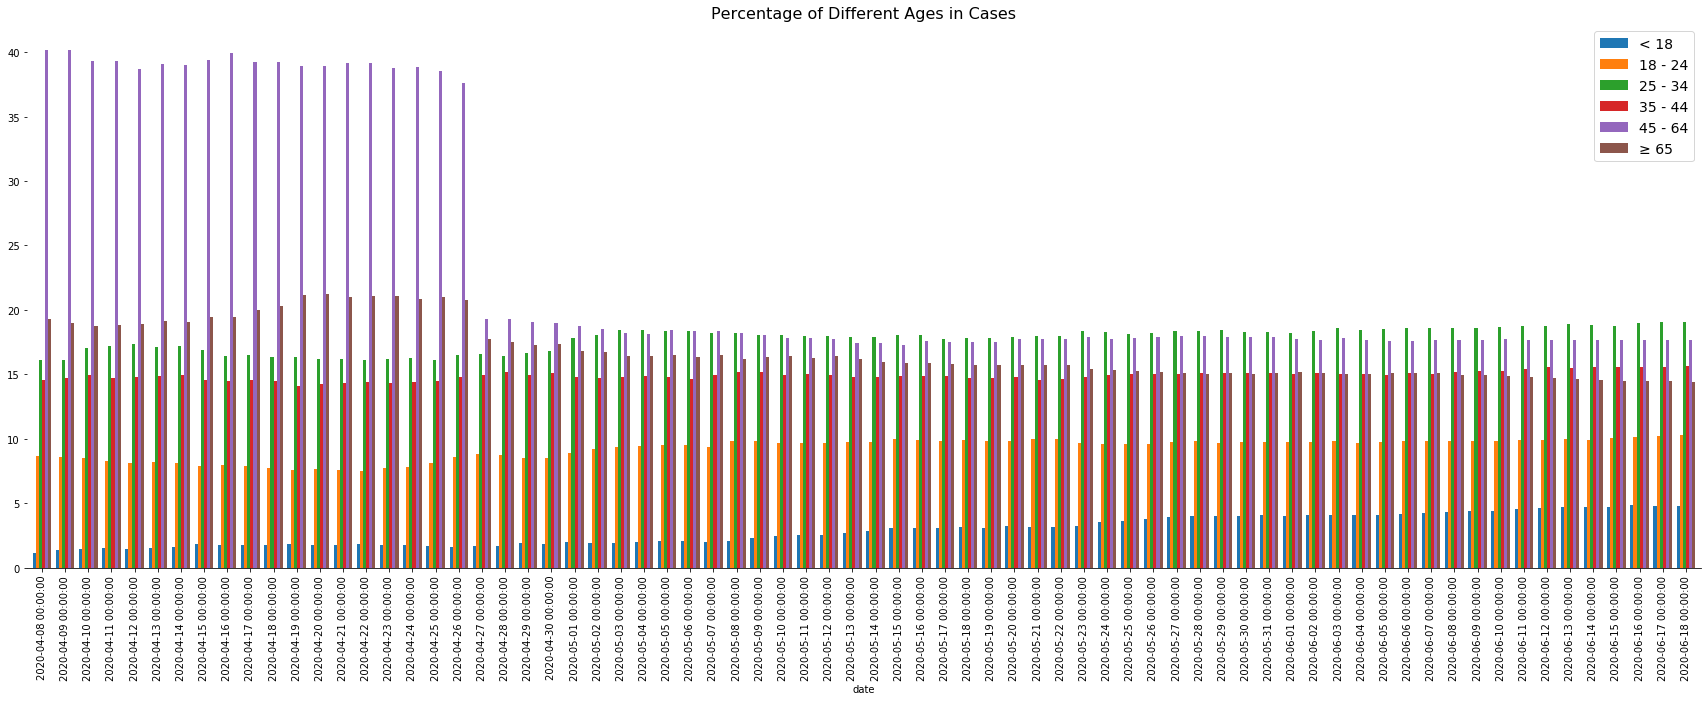

In [9]:
ax = df_case_by_age.set_index('date').plot(kind='bar',
                 width = 0.8,
                 figsize=(30, 10))

ax.set_title('Percentage of Different Ages in Cases', fontsize = 16)
ax.legend(fontsize = 14, loc = 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

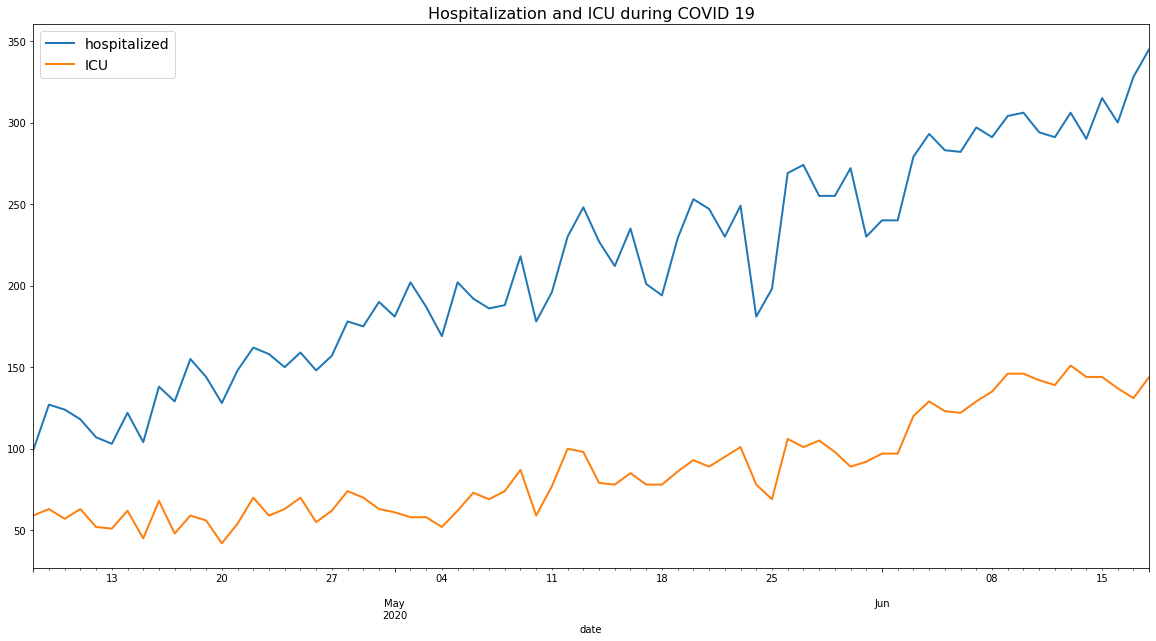

In [10]:
ax = df_hospitalized_ICU.set_index('date').plot(kind='line',
                                                linewidth = 2,
                                                figsize=(20, 10))
ax.set_title('Hospitalization and ICU during COVID 19', fontsize = 16)
ax.legend(fontsize = 14, loc = 2)



In [11]:
date.append('city')

In [12]:
city = sorted(city)
dicta = {}
for i in city:
    dicta[i] = []
iterator = 0
for i in data['counts'][33:]:
    iterator += 1
    for j in i['location'][:-3]:
        dicta[j['city']].append(int(j['cases']))
    for k in dicta:
        if len(dicta[k]) == iterator-1:
            dicta[k].append(0)
df_city_cases = pd.DataFrame(dicta)
df_city_cases = df_city_cases.T

df_city_cases['city'] = df_city_cases.index
df_city_cases.columns = date
df_city_cases.reset_index(drop=True, inplace = True)
cols = df_city_cases.columns
new_cols = [cols[-1]]
for i in cols[0:-1]:
    new_cols.append(i)
df_city_cases = df_city_cases[new_cols]

In [13]:
df_num_per_ten_thous = pd.concat([df_city_cases.iloc[:,0], df_city_cases.iloc[:,-1], df_city['Population']], 
                                 axis = 1,
                                 keys = ['City', 'Cases on June 18', 'Population'])
df_num_per_ten_thous['num_per_ten_thous'] = 10000 * df_num_per_ten_thous['Cases on June 18'] / df_num_per_ten_thous['Population']

In [14]:
map_orangecounty = folium.Map(location=[33.7175, -117.8311], zoom_start=10)

# add markers to map
for lat, lng, city, sz in zip(df_city['Latitude'], df_city['Longitude'], df_city['City'], df_num_per_ten_thous['num_per_ten_thous']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=15*sz/max(df_num_per_ten_thous['num_per_ten_thous']),
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_orangecounty)
map_orangecounty

In [15]:
CLIENT_ID = 'HBES03NPAMYR4TUF3WRJSDRZW4KNIE1LRABG4TN00JCZSF0U' # your Foursquare ID
CLIENT_SECRET = 'KR1KG4F1WEDJTDWWLKZUCGRW1EBJ4HEI3A1UROUCVHBD5HRE' # your Foursquare Secret
VERSION = '202006055' # Foursquare API version

In [16]:
city_list = df_city['City'].tolist()
city_list
n_hos_dict = {}
for i in city_list:
    n_hos_dict[i] = []
for lat, lng in zip(df_city['Latitude'], df_city['Longitude']):
    url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&query=hospital'.format(CLIENT_ID, 
                                                                                                                         CLIENT_SECRET, 
                                                                                                                         VERSION, 
                                                                                                                         lat, 
                                                                                                                         lng,
                                                                                                                         1000)
    results = requests.get(url).json()
    for i in results['response']['venues']:
        if 'city' in i['location']:
            if i['location']['city'] in n_hos_dict:
                n_hos_dict[i['location']['city']].append(i['name'])

In [17]:
num_hos_list = []
for i in n_hos_dict:
    num_hos_list.append(len(set(n_hos_dict[i])))

In [18]:
df_city['num_hospital'] = num_hos_list

In [19]:
df = pd.concat([df_city['City'], df_city_cases.iloc[:,-1], df_city['Population'], df_city['num_hospital']],
               axis = 1,
               keys = ['City', 'Cases on June 18', 'Population', 'num_hospital'])
df.set_index('City', inplace = True)

In [20]:
bins_pop = np.array([6000, 29000, 89000, 360000])
bins_hos = np.array([0, 1, 5, 43])

In [21]:
group_pop = ['low population', 'medium population', 'high population']
group_hos = ['less hospitals', 'medium hospitals', 'more hospitals']

In [22]:
df['binned_pop'] = pd.cut(df['Population'], bins_pop, labels = group_pop, include_lowest = True)
df['binned_hos'] = pd.cut(df['num_hospital'], bins_hos, labels = group_hos, include_lowest = True)
df_final = pd.concat([df, pd.get_dummies(df[['binned_pop', 'binned_hos']])], axis = 1)

In [23]:
df_final['cases_percentage'] = df_final['Cases on June 18']/df_final['Population'] * 100

In [24]:
df_final.drop(['Population', 'num_hospital', 'binned_pop', 'binned_hos', 'Cases on June 18'], axis = 1, inplace = True)

In [25]:
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_final)

df_final['label'] = kmeans.labels_

In [27]:
map_clusters = folium.Map(location=[33.7175, -117.8311], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_city['Latitude'], df_city['Longitude'], df_city['City'], df_final['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
df_cluster_0 = df_final.loc[df_final['label'] == 0, :]
df_cluster_0

,binned_pop_low population,binned_pop_medium population,binned_pop_high population,binned_hos_less hospitals,binned_hos_medium hospitals,binned_hos_more hospitals,cases_percentage,label
City,,,,,,,,
Brea,0,1,0,0,1,0,0.129369,0
Buena Park,0,1,0,0,1,0,0.342991,0
Cypress,0,1,0,0,1,0,0.184617,0
Dana Point,0,1,0,0,1,0,0.108032,0
Fountain Valley,0,1,0,0,1,0,0.146509,0
La Habra,0,1,0,0,1,0,0.291146,0
Laguna Hills,0,1,0,0,1,0,0.155201,0
Lake Forest,0,1,0,0,1,0,0.111181,0
Rancho Santa Margarita,0,1,0,0,1,0,0.077614,0


In [29]:
df_cluster_1 = df_final.loc[df_final['label'] == 1, :]
df_cluster_1

,binned_pop_low population,binned_pop_medium population,binned_pop_high population,binned_hos_less hospitals,binned_hos_medium hospitals,binned_hos_more hospitals,cases_percentage,label
City,,,,,,,,
Aliso Viejo,0,1,0,1,0,0,0.073970,1
Ladera Ranch,0,1,0,1,0,0,0.066033,1
Placentia,0,1,0,1,0,0,0.328665,1
Rancho Mission Viejo,0,1,0,1,0,0,0.029984,1
Villa Park,0,0,0,1,0,0,0.168549,1


In [30]:
df_cluster_2 = df_final.loc[df_final['label'] == 2, :]
df_cluster_2

,binned_pop_low population,binned_pop_medium population,binned_pop_high population,binned_hos_less hospitals,binned_hos_medium hospitals,binned_hos_more hospitals,cases_percentage,label
City,,,,,,,,
Anaheim,0,0,1,0,1,0,0.496467,2
Costa Mesa,0,0,1,0,1,0,0.162307,2
Fullerton,0,0,1,0,1,0,0.249958,2
Garden Grove,0,0,1,0,1,0,0.309440,2
Huntington Beach,0,0,1,0,1,0,0.223301,2
Irvine,0,0,1,0,1,0,0.089935,2
Santa Ana,0,0,1,0,1,0,0.590437,2
Westminster,0,0,1,0,1,0,0.219199,2


In [31]:
df_cluster_3 = df_final.loc[df_final['label'] == 3, :]
df_cluster_3

,binned_pop_low population,binned_pop_medium population,binned_pop_high population,binned_hos_less hospitals,binned_hos_medium hospitals,binned_hos_more hospitals,cases_percentage,label
City,,,,,,,,
Coto de Caza,1,0,0,1,0,0,0.046882,3
La Palma,1,0,0,1,0,0,0.189633,3
Laguna Beach,1,0,0,0,1,0,0.222622,3
Laguna Woods,1,0,0,1,0,0,0.084756,3
Los Alamitos,1,0,0,0,1,0,0.733726,3
Midway City,1,0,0,1,0,0,0.322427,3
Rossmoor,1,0,0,1,0,0,0.107527,3
Seal Beach,1,0,0,0,1,0,0.279185,3
Trabuco Canyon,1,0,0,1,0,0,0.090300,3


In [32]:
df_cluster_4 = df_final.loc[df_final['label'] == 4, :]
df_cluster_4

,binned_pop_low population,binned_pop_medium population,binned_pop_high population,binned_hos_less hospitals,binned_hos_medium hospitals,binned_hos_more hospitals,cases_percentage,label
City,,,,,,,,
Laguna Niguel,0,1,0,0,0,1,0.071912,4
Mission Viejo,0,0,1,0,0,1,0.101624,4
Newport Beach,0,1,0,0,0,1,0.208763,4
Orange,0,0,1,0,0,1,0.286539,4
San Juan Capistrano,0,1,0,0,0,1,0.187393,4
